In [ ]:
# Imports and Dataset - #id:21--42--21
import pandas as pd
import numpy as np
dataframe = pd.read_csv("week3.csv", header=None)
print(dataframe.head())

X1=dataframe.iloc[:,0]
X2=dataframe.iloc[:,1]
X = np.column_stack((X1,X2))

y = dataframe.iloc[:,2]

      0     1         2
0  0.77  0.84 -2.097656
1  0.29 -0.45  0.084953
2 -0.10  0.76 -0.786532
3  0.41 -0.21 -0.343190
4 -0.67  0.29 -1.111476


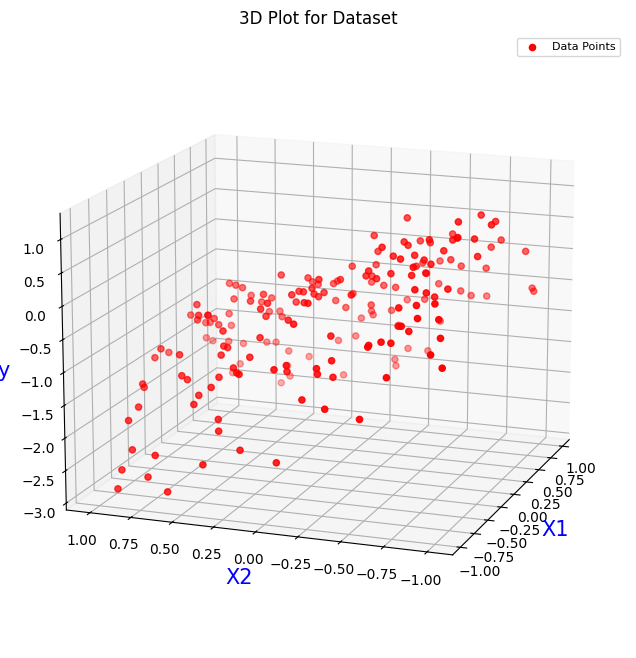

In [ ]:
#i(a)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# figure = plt.figure(figsize=(10,8), facecolor='lightgrey')
figure = plt.figure(figsize=(10,8))

axes = figure.add_subplot(111,projection='3d')

axes_color='blue'
axes_size=15
axes.scatter(X1,X2,y, s=20 , label='Data Points', color='red')
axes.set_xlabel("X1",color=axes_color, fontsize=axes_size)
axes.set_ylabel("X2",color=axes_color,fontsize=axes_size)
axes.set_zlabel("y",color=axes_color,fontsize=axes_size)

axes.view_init(15,200)

axes.set_title("3D Plot for Dataset")
plt.legend(fontsize=8)
plt.show()


In [ ]:
#i(b)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

poly_5 = PolynomialFeatures(degree=5)
X_poly_5= poly_5.fit_transform(X)


C=[1,10,50,500,1000]
print("* Lasso *")
for c in C:
  alpha = (1/(2*c))
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_poly_5,y)
  print("C = " , c)
  print("alpha = " ,alpha )
  print("Intercept = " , lasso.intercept_)
  print("Coefficients = " , lasso.coef_)
  print("Score = " , lasso.score(X_poly_5,y))
  print("-----------------------------------------------------------------------------------------------------")

* Lasso *
C =  1
alpha =  0.5
Intercept =  -0.6313238413718594
Coefficients =  [ 0.  0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.
 -0.  0. -0.]
Score =  0.0
-----------------------------------------------------------------------------------------------------
C =  10
alpha =  0.05
Intercept =  -0.17803275393553036
Coefficients =  [ 0.          0.         -0.85714462 -1.4170634   0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.        ]
Score =  0.901869395355858
-----------------------------------------------------------------------------------------------------
C =  50
alpha =  0.01
Intercept =  -0.03721761404811963
Coefficients =  [ 0.          0.         -0.96149013 -1.848706    0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.  

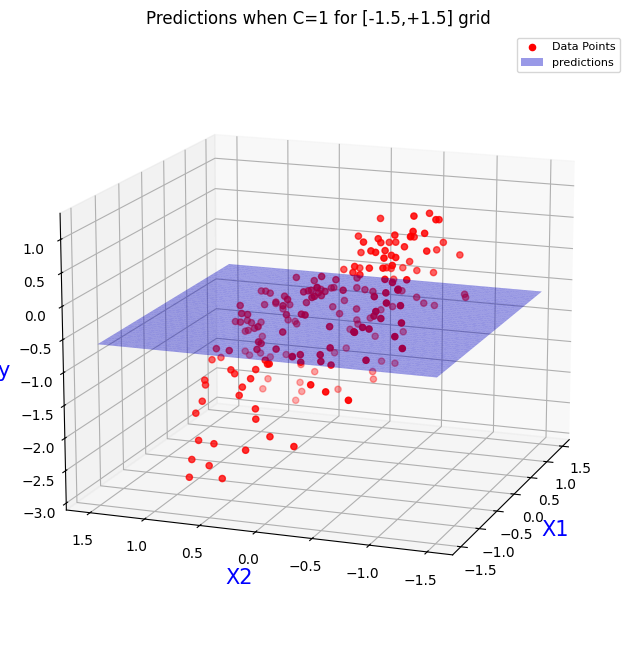

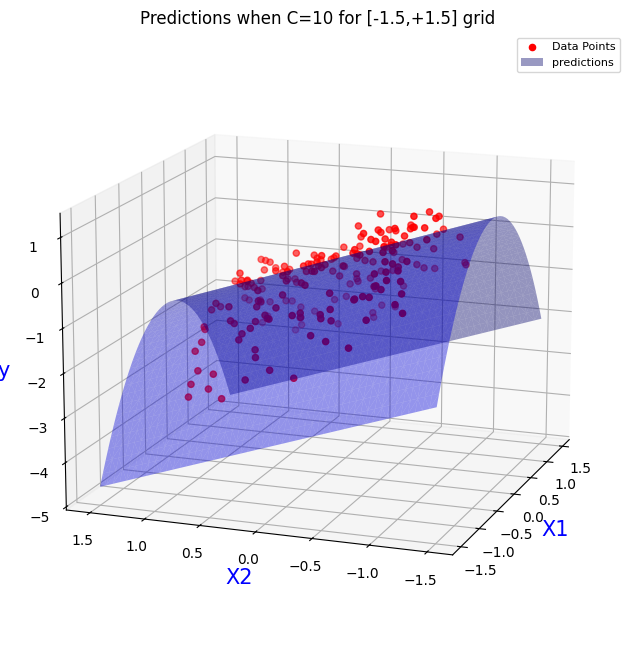

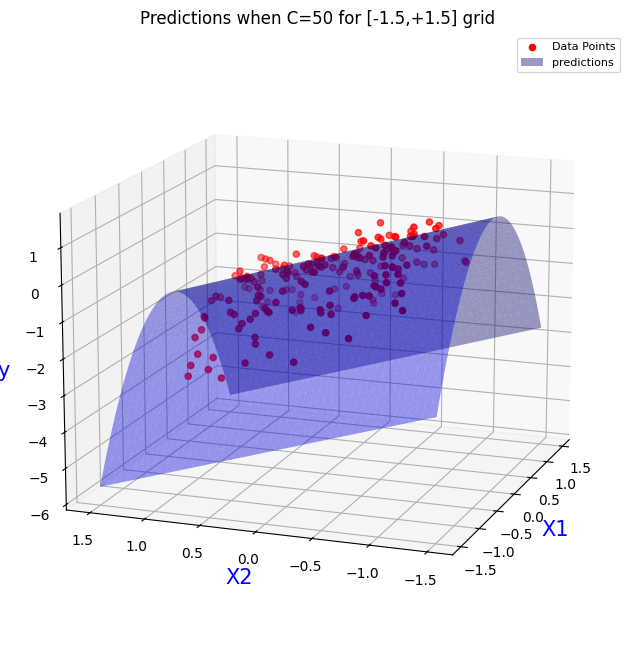

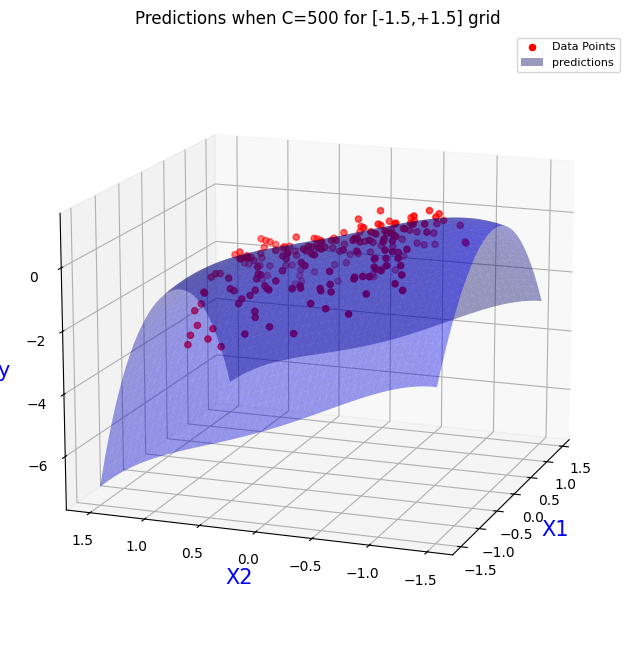

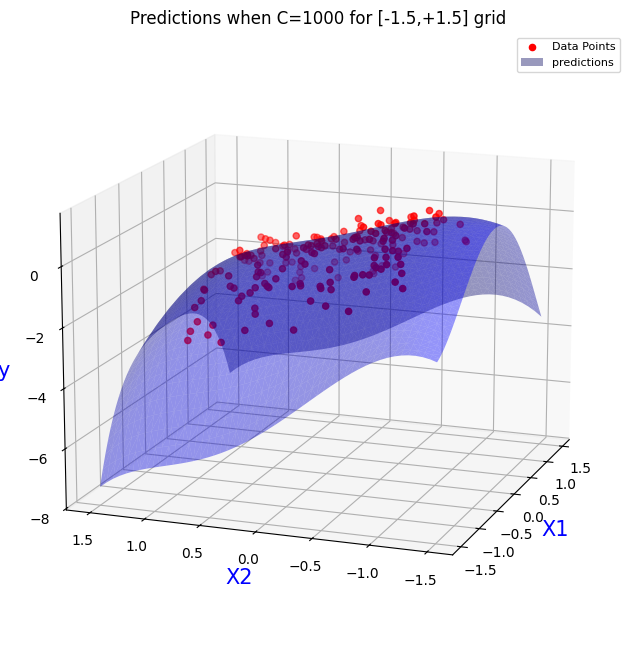

In [ ]:
# i(c)

Xtest = []
grid = np.linspace(-1.5,+1.5)
for i in grid:
  for j in grid:
    Xtest.append([i,j])

Xtest = np.array(Xtest)
Xtest_poly_5 = poly_5.fit_transform(Xtest)


def predictLasso(C,range):
  for c in C:
    alpha = (1/(2*c))
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_poly_5,y)
    predictions=lasso.predict(Xtest_poly_5)

    figure = plt.figure(figsize=(10,8))
    axes = figure.add_subplot(111,projection='3d')
    axes_color='blue'
    axes_size=15
    axes.scatter(X1,X2,y, s=20 , label='Data Points', color='red')
    axes.set_xlabel("X1",color=axes_color, fontsize=axes_size)
    axes.set_ylabel("X2",color=axes_color,fontsize=axes_size)
    axes.set_zlabel("y",color=axes_color,fontsize=axes_size)
    axes.view_init(15,200)
    axes.set_title(f"Predictions when C={c} for [-{range},+{range}] grid")


    axes.plot_trisurf(Xtest[:,0],Xtest[:,1], predictions, label='predictions',color='blue' , alpha=0.4)

    plt.legend(fontsize=8)
    plt.show()

predictLasso(C,1.5)


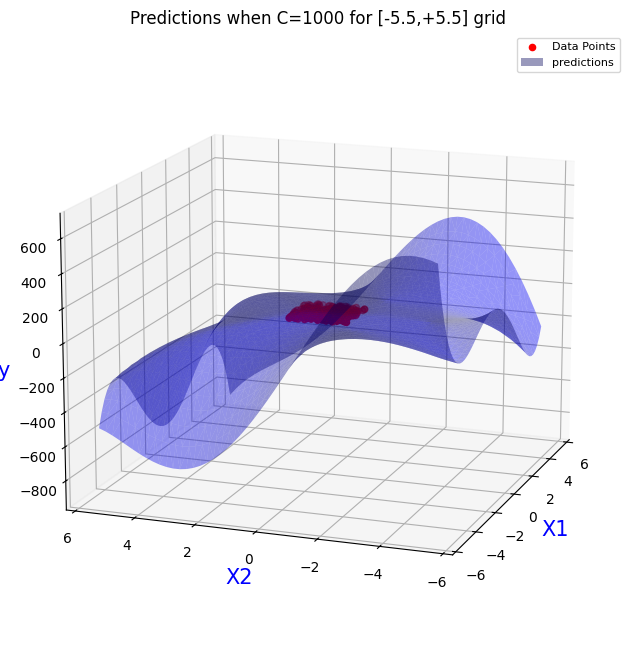

In [ ]:
# i(c)
Xtest = []
grid = np.linspace(-5.5,+5.5)
for i in grid:
  for j in grid:
    Xtest.append([i,j])

Xtest = np.array(Xtest)
Xtest_poly_5 = poly_5.fit_transform(Xtest)

predictLasso([1000],5.5)

In [ ]:
# i(e)
from sklearn.linear_model import Ridge

C_ridge=[0.0001, 0.01,1,10,200]
print("* Ridge *")
for c in C_ridge:
  alpha = (1/(2*c))
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_poly_5,y)
  print("C = " , c)
  print("alpha = " ,alpha )
  print("Intercept = " , ridge.intercept_)
  print("Coefficients = " , ridge.coef_)
  print("Score = " , ridge.score(X_poly_5,y))
  print("-----------------------------------------------------------------------------------------------------")



* Ridge *
C =  0.0001
alpha =  5000.0
Intercept =  -0.6276331444442125
Coefficients =  [ 0.00000000e+00  3.04995148e-05 -1.37163490e-02 -7.40392004e-03
  1.15291290e-03  1.37639222e-04  2.49702547e-04 -4.77104408e-03
  3.07700962e-04 -8.09633141e-03 -6.47344241e-03  8.57243443e-04
 -2.33730877e-03  6.39592165e-04 -6.33080493e-05  2.25574236e-04
 -3.09913687e-03  5.03808385e-04 -2.79859894e-03  2.91780828e-04
 -5.65654025e-03]
Score =  0.028952328413530792
-----------------------------------------------------------------------------------------------------
C =  0.01
alpha =  50.0
Intercept =  -0.41453239309110523
Coefficients =  [ 0.         -0.00094255 -0.43710487 -0.43065269  0.02607804  0.01503918
  0.00125782 -0.1284251   0.01392136 -0.21890857 -0.36537124  0.02026385
 -0.12641612  0.01368555 -0.0058528  -0.00154583 -0.08473919  0.01781533
 -0.05774855  0.00960031 -0.13290861]
Score =  0.7302241743449063
-------------------------------------------------------------------------------

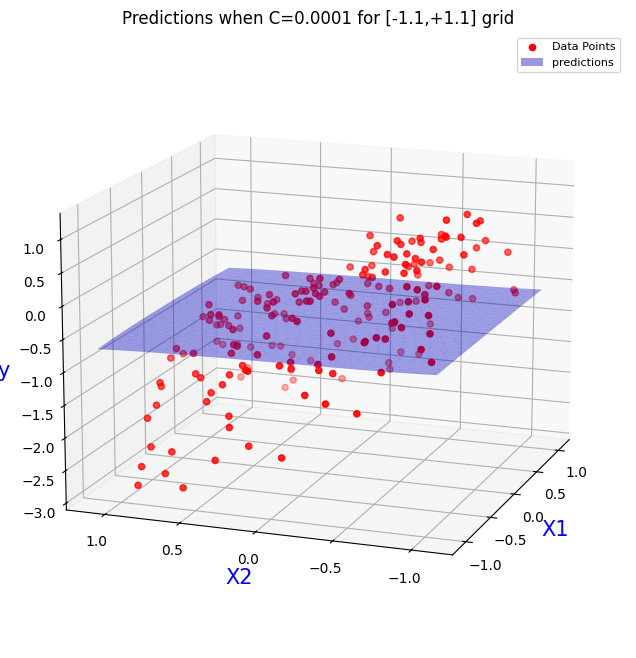

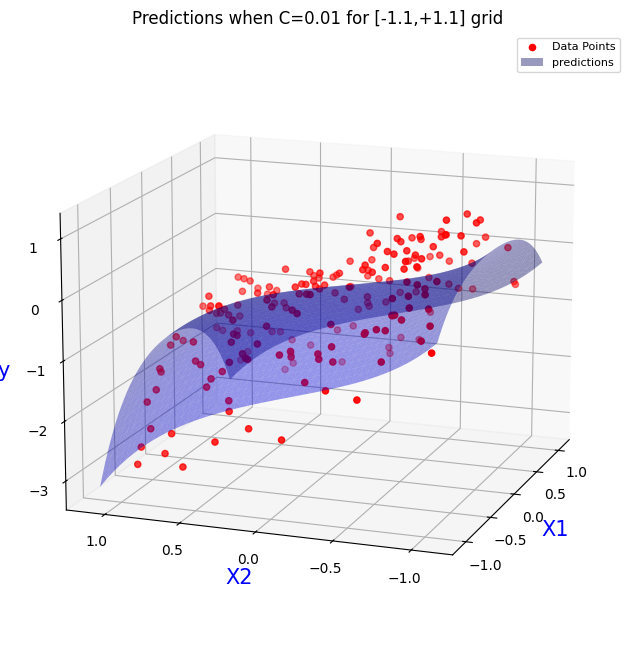

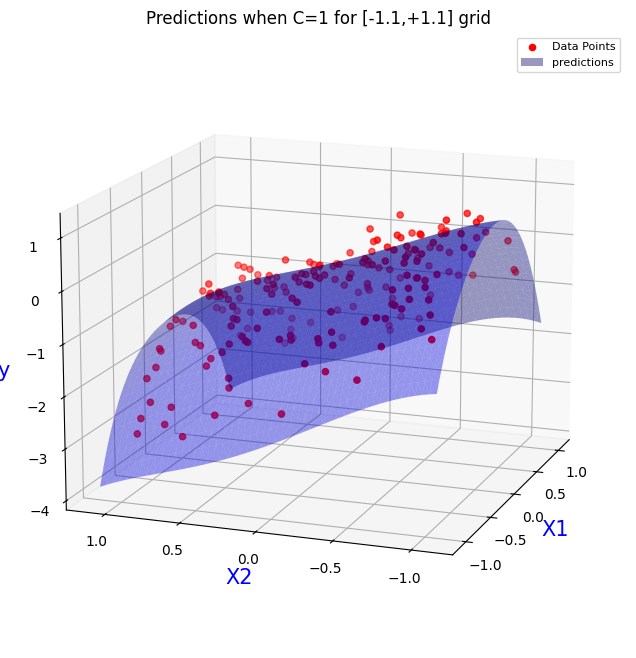

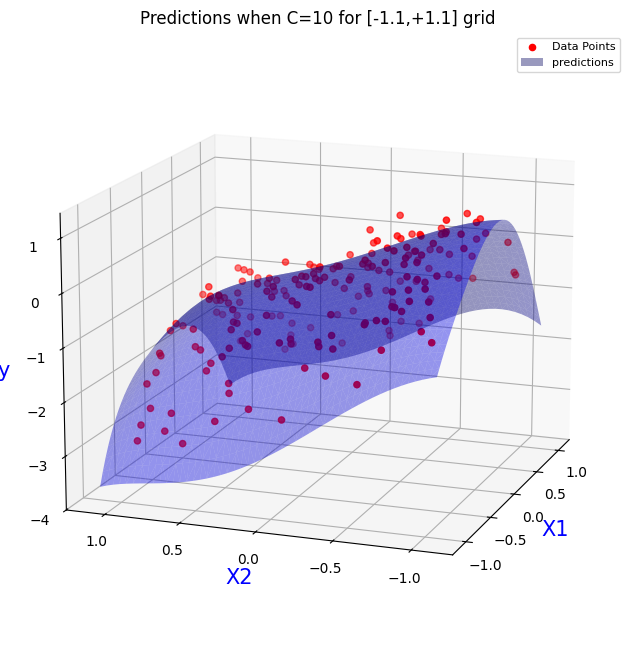

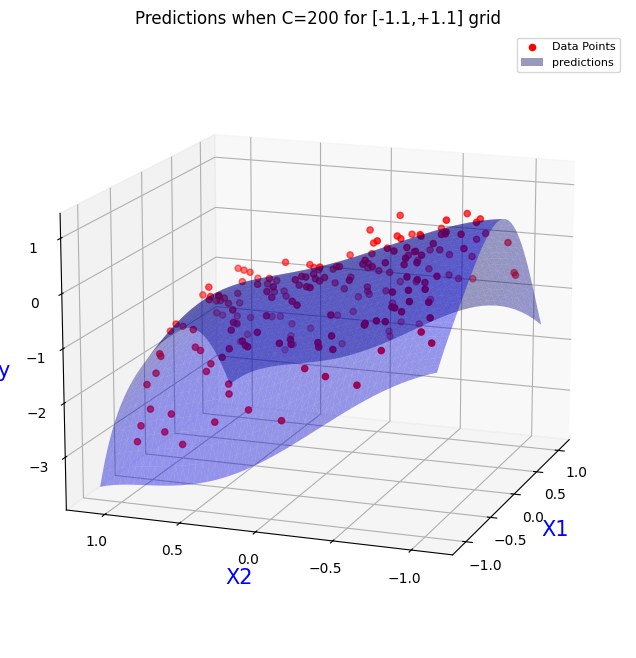

In [ ]:



Xtest_ridge = []
grid_size = 1.1
grid = np.linspace(-grid_size,+grid_size)
for i in grid:
  for j in grid:
    Xtest_ridge.append([i,j])

Xtest_ridge = np.array(Xtest_ridge)
Xtest_poly_5 = poly_5.transform(Xtest_ridge)


def predictRidge(C,range):
  for c in C:
    alpha = (1/(2*c))
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly_5,y)
    predictions=ridge.predict(Xtest_poly_5)

    figure = plt.figure(figsize=(10,8))
    axes = figure.add_subplot(111,projection='3d')
    axes_color='blue'
    axes_size=15
    axes.scatter(X1,X2,y, s=20 , label='Data Points', color='red')
    axes.set_xlabel("X1",color=axes_color, fontsize=axes_size)
    axes.set_ylabel("X2",color=axes_color,fontsize=axes_size)
    axes.set_zlabel("y",color=axes_color,fontsize=axes_size)
    axes.view_init(15,200)
    axes.set_title(f"Predictions when C={c} for [-{range},+{range}] grid")


    axes.plot_trisurf(Xtest_ridge[:,0],Xtest_ridge[:,1], predictions, label='predictions',color='blue' , alpha=0.4)

    plt.legend(fontsize=8)
    plt.show()

predictRidge(C_ridge,grid_size)

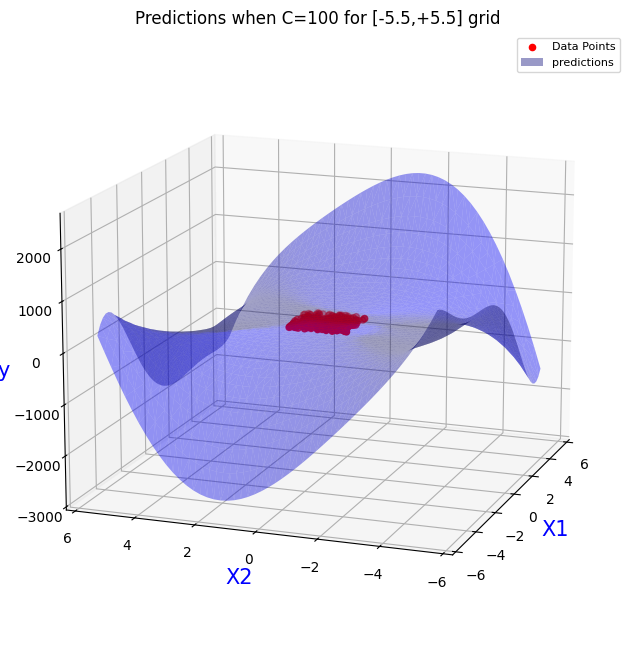

In [ ]:
# i(e)
Xtest_ridge = []
grid_size = 5.5
grid = np.linspace(-grid_size,+grid_size)
for i in grid:
  for j in grid:
    Xtest_ridge.append([i,j])

Xtest_ridge = np.array(Xtest_ridge)
Xtest_poly_5 = poly_5.fit_transform(Xtest_ridge)

predictRidge([100],grid_size)

C ->  0.1
Mean square error -> 0.7589486919855426
Std Deviation -> 0.18680618487631598
_________________________________
C ->  0.5
Mean square error -> 0.7589486919855426
Std Deviation -> 0.18680618487631598
_________________________________
C ->  3
Mean square error -> 0.4334494662074885
Std Deviation -> 0.13124834201135835
_________________________________
C ->  15
Mean square error -> 0.058491156932602276
Std Deviation -> 0.009094663070056219
_________________________________
C ->  30
Mean square error -> 0.04637936853937179
Std Deviation -> 0.00303576846385415
_________________________________
C ->  80
Mean square error -> 0.04298545504781755
Std Deviation -> 0.003737232581107147
_________________________________
C ->  150
Mean square error -> 0.04349436335231175
Std Deviation -> 0.0052933361606506135
_________________________________


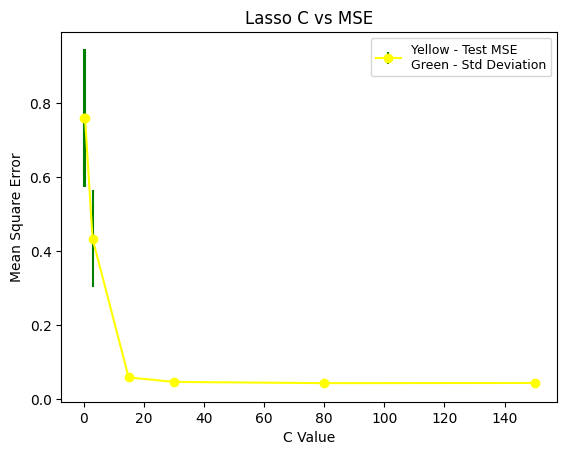

In [ ]:
# # ii(a)(b)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

mean_err=[]
std_err=[]
C_Lasso = [0.1, 0.5, 3, 15, 30, 80,150]

for c_lasso in C_Lasso:
  lasso_model = Lasso(alpha=1/(2*c_lasso))
  temp=[]

  k_fold = KFold(n_splits=5)

  for train,test in k_fold.split(X_poly_5):
    lasso_model.fit(X_poly_5[train], y[train])
    pred = lasso_model.predict(X_poly_5[test])
    temp.append(mean_squared_error(y[test],pred))

  mean_err.append(float(np.array(temp).mean()))
  std_err.append(float(np.array(temp).std()))

  print("C -> " , c_lasso)
  print("Mean square error ->",float(np.array(temp).mean()) )
  print("Std Deviation ->",float(np.array(temp).std()) )
  print("_________________________________")


plt.errorbar(C_Lasso,mean_err,yerr=std_err,ecolor='green',fmt='-o' , label="Yellow - Test MSE\nGreen - Std Deviation",color="yellow")
plt.xlabel("C Value")
plt.ylabel("Mean Square Error")
plt.legend(fontsize=9)
plt.title("Lasso C vs MSE")
plt.show()




C ->  0.1
Mean square error -> 0.06356382692938213
Std Deviation -> 0.010259329998023198
_________________________________
C ->  0.5
Mean square error -> 0.04889942545827395
Std Deviation -> 0.005922575555142659
_________________________________
C ->  3
Mean square error -> 0.04424230710594508
Std Deviation -> 0.00591075009447025
_________________________________
C ->  15
Mean square error -> 0.043602553916614786
Std Deviation -> 0.005163705361856022
_________________________________
C ->  30
Mean square error -> 0.043708258191983575
Std Deviation -> 0.0049975383497864925
_________________________________
C ->  80
Mean square error -> 0.04384509664897842
Std Deviation -> 0.004898313154116749
_________________________________
C ->  150
Mean square error -> 0.043897439321648454
Std Deviation -> 0.004873986263037629
_________________________________


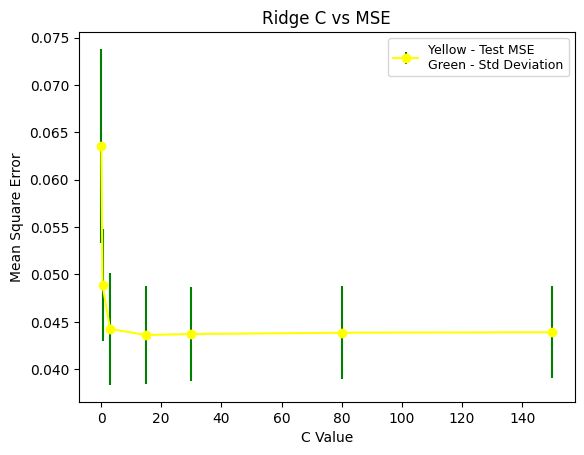

In [ ]:
# ii(c)


mean_err_R=[];
std_err_R=[]
C_Ridge = [0.1, 0.5, 3, 15, 30, 80,150]

for c_ridge in C_Ridge:
  ridge_model = Ridge(alpha=1/(2*c_ridge))
  temp=[]
  k_fold = KFold(n_splits=5)

  for train,test in k_fold.split(X_poly_5):
    ridge_model.fit(X_poly_5[train], y[train])
    pred = ridge_model.predict(X_poly_5[test])
    temp.append(mean_squared_error(y[test],pred))


  mean_err_R.append(float(np.array(temp).mean()))
  std_err_R.append(float(np.array(temp).std()))

  print("C -> " , c_ridge)
  print("Mean square error ->",float(np.array(temp).mean()) )
  print("Std Deviation ->",float(np.array(temp).std()) )
  print("_________________________________")


plt.errorbar(C_Ridge,mean_err_R,yerr=std_err_R,ecolor='green',fmt='-o' , label="Yellow - Test MSE\nGreen - Std Deviation",color="yellow")
plt.xlabel("C Value")
plt.ylabel("Mean Square Error")
plt.legend(fontsize=9)
plt.title("Ridge C vs MSE")
plt.show()




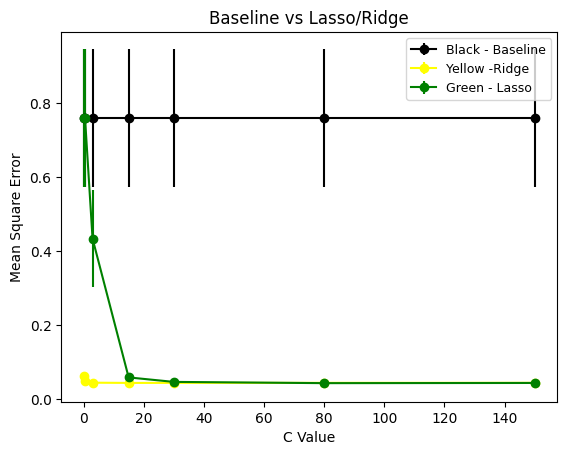

In [ ]:
# Baseline
from sklearn.dummy import DummyRegressor

mean_err_B=[];
std_err_B=[]

for c_base in C_Ridge:
  base_model = DummyRegressor(strategy='mean')
  temp=[]
  k_fold = KFold(n_splits=5)

  for train,test in k_fold.split(X_poly_5):
    base_model.fit(X_poly_5[train], y[train])
    pred = base_model.predict(X_poly_5[test])
    temp.append(mean_squared_error(y[test],pred))

  mean_err_B.append(float(np.array(temp).mean()))
  std_err_B.append(float(np.array(temp).std()))

plt.errorbar(C_Ridge,mean_err_B,yerr=std_err_B,ecolor='black',fmt='-o' , label="Black - Baseline",color="black")
plt.errorbar(C_Ridge,mean_err_R,yerr=std_err_R,ecolor='yellow',fmt='-o' , label="Yellow -Ridge",color="yellow")
plt.errorbar(C_Lasso,mean_err,yerr=std_err,ecolor='green',fmt='-o' , label="Green - Lasso",color="green")

plt.xlabel("C Value")
plt.ylabel("Mean Square Error")
plt.legend(fontsize=9)
plt.title("Baseline vs Lasso/Ridge")
plt.show()
